# Part II - Effects of Personal Status on Loans and Loan Rates 
## by Adiji Ayomiposi

I will be focusing on the home owner feature, Loan amount, ProsperScore and the Income status( Income Range, employment) as ot relates with the Annual Borrower Rate.

## Investigation Overview

The goal of this presentation is for you to see the relationship between the  Loan amount, Homeowner status, Income status, Prosper Score affects the Annual Borrower Rate.


## Dataset Overview

The data consisted of borrower rates and attributes of approximately 113,937 loan records. The attributes included the original amount of the loan, the monthly payment of each loan, borrower yearly income range, the monthly income, homeowner status.About 40, 000 were removed from the analysis to have more accurate information and also to ensure the data was up to date. Records before July 2009 were also removed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

default_color = sns.color_palette()[0]

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosper_loan.csv')

In [3]:
loan['Occupation'] = loan['Occupation'].astype('category')

ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not employed',
                                    '$1-24,999',
                                    '$25,000-49,999',
                                    '$50,000-74,999',
                                    '$75,000-99,999',
                                    '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)
    
loan['ListingCategory'] = loan['ListingCategory'].astype('category')

## Distribution of Borrower Rate

Borrower Rate in the dataset take on a very small range of values, from about 0.04583 at the lowest, to 0.42395 at the highest. The distribution of borrower rates takes on a bimodal shape. The first mode being uniform, and the second mode a sudden spike.

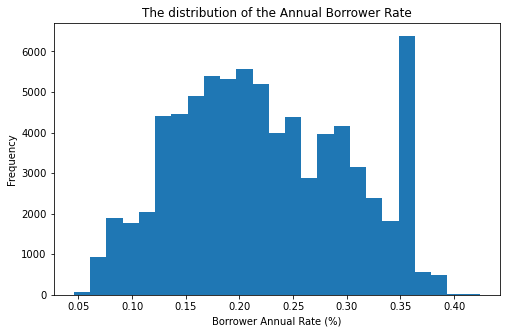

In [4]:
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins=25)
plt.xlabel('Borrower Annual Rate (%)')
plt.ylabel('Frequency')
plt.title('The distribution of the Annual Borrower Rate')
plt.show()

## The distribution of the Loan Amount and Monthly Payment

The Loan amount in US Dollars, is the amount the borrowerrs requests to take as loan. The loan monthly payment is the agreed amount to be paid back monthly.

The distributon of the loan amount is seen to have spikes at regula intervals of 5000, more people take rounded up numbers as loan, not $22,000

The distribution of the monthly payment is skewed to the right, with the mode at 200 mark, this might be a reflection of the monthly income of each borrower. I had to limit this to 1000 to zoom  into the main distribution.

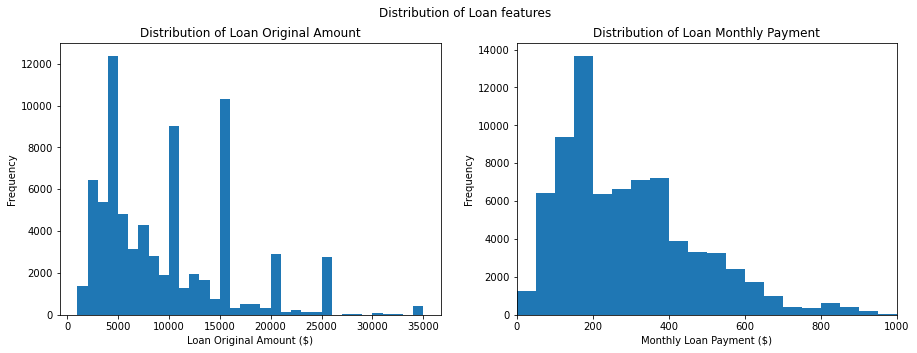

In [5]:
plt.figure(figsize=[15, 5])
plt.suptitle('Distribution of Loan features')

plt.subplot(1, 2, 1)
bins= np.arange(loan.LoanOriginalAmount.min(), loan.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data = loan, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Original Amount')

plt.subplot(1, 2, 2)
bins= np.arange(loan.MonthlyLoanPayment.min(), loan.MonthlyLoanPayment.max()+50, 50)
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Monthly Payment')
# zooming into the 0 - 1000 as that is where most data are
plt.xlim(0, 1000);

## Loan Original Amount vs Borrower Rate

Since the loan original amount has spikes at interval, grouping this into categories and checking it against the Borrower Rate, a trend is seen. The larger the amount of loan taken, the lower the rate on it.

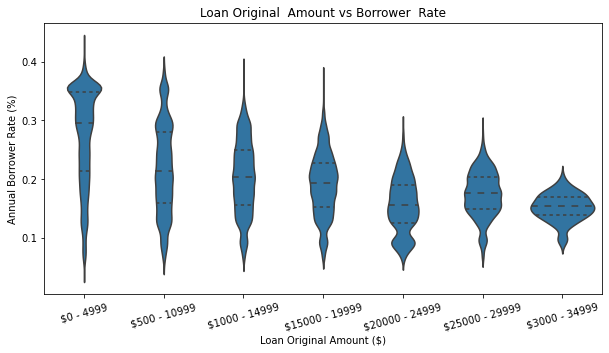

In [6]:
# ordered category
label = ['$0 - 4999',
         '$500 - 10999',
         '$1000 - 14999',
         '$15000 - 19999',
         '$20000 - 24999',
         '$25000 - 29999', 
         '$3000 - 34999'
        ]

loan_cat = pd.api.types.CategoricalDtype(ordered=True, categories=label)
loan['loanamount_cat'] = loan['loanamount_cat'].astype(loan_cat)

plt.figure(figsize=[10, 5])
sns.violinplot(data=loan, x='loanamount_cat', y='BorrowerAPR', color=default_color, inner='quartile')
plt.xticks(rotation=15)
plt.ylabel('Annual Borrower Rate (%)')
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original  Amount vs Borrower  Rate');

## The monthly income distribution

We'll be viewing the distribution of the monthly income of the records in the dataset.

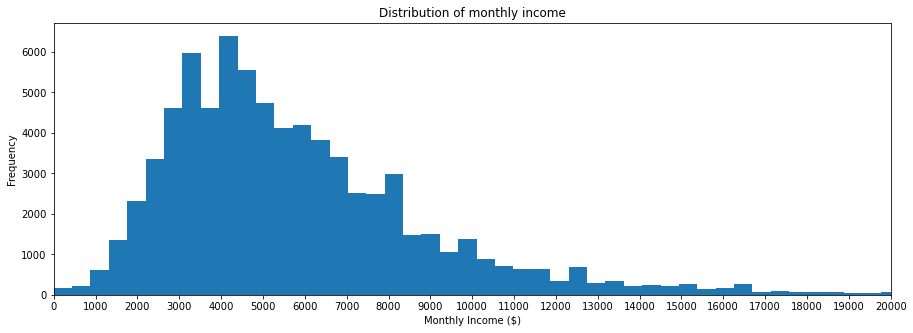

In [7]:
plt.figure(figsize=[15, 5])

bins=bins = np.arange(0.25, 20000+1000, 1000)
loan['StatedMonthlyIncome'].plot(kind='hist', bins=1100)
plt.xlim(0,20000)
plt.xticks(bins, label=bins)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Frequency')
plt.title('Distribution of monthly income');

## The Home owner status ratio

The home owner status is a True or False. Those with mortgage proofs are regarded as home owners, A large number of the borrowers are home owners. About 54% of the borrowers own homes

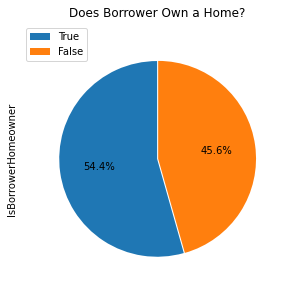

In [8]:
# create size for plot
plt.figure(figsize=[8, 5])

# create function for plotting pie chart
def custom_pie(data,pctdistance=1.1,colors=['C0', 'C1']):
    labels = ['True', 'False']
    colours = {'True': 'C0',
           'False': 'C1'}
    data.value_counts().plot(kind='pie', 
                             autopct='%1.1f%%', 
                             explode=(0, 0.01), 
                             labeldistance=None, 
                             radius=0.9, 
                             startangle=90, 
                             pctdistance=pctdistance, 
                             colors=colors)

custom_pie(data=loan['IsBorrowerHomeowner'], pctdistance=0.6)
plt.title('Does Borrower Own a Home?')
plt.legend();

## The distribution of the prosper rating

The Prosper Rating is the rating given to a loan as soon as it is listed, it is a categoriacl feature of HR, E, D, C, B, A, AA in order, with AA being the lowest risk loan.

The distribution shows a uniform trend with the rating C taking dominace in the datset, AA nad HR have the least representation

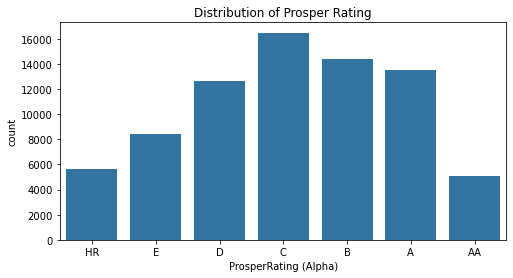

In [9]:
plt.figure(figsize=[8, 4])
sns.countplot(data=loan, x='ProsperRating (Alpha)', color = default_color);
plt.title('Distribution of Prosper Rating');

## Distribution of number of Investors
The number of investors on a loan, the distribution shows that most loans have less than 10 investors, so subsetting the data to only show those less than zero to give a sense of view of the distribution

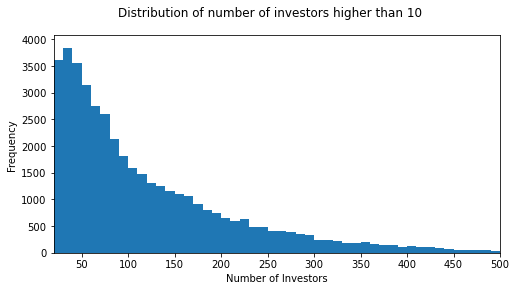

In [10]:
plt.figure(figsize=[8, 4])
plt.suptitle('Distribution of number of investors higher than 10')

bins = np.arange(10, 510, 10)
loan['Investors'].plot(kind='hist', bins=bins)
plt.xlim(20,500)

ticks = np.arange(50, 550, 50)
plt.xticks(ticks, ticks)
plt.xlabel('Number of Investors');

##  Borrower Rate vs. Prosper Rating
Plotting Borrower Rate on the y axis against the categorical prosper rating, I chose a boxplot to show the relationship between them. We might expect that the higher the rating(less risk) the lower the Borrower Rate

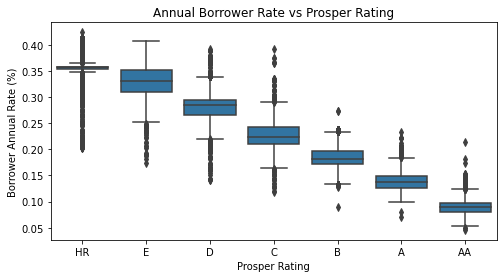

In [11]:
plt.figure(figsize=[8, 4])
sns.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.ylabel('Borrower Annual Rate (%)')
plt.xlabel('Prosper Rating')
plt.title('Annual Borrower Rate vs Prosper Rating');


##  Borrower Rate vs. Nummber of investors
Plotting Borrower Rate on the y axis against the number of investors, We might expect that the more the investors the lower the Borrower Rate. Naturally noone will invest in a high risk loan. But we will let the graphs do the talking.

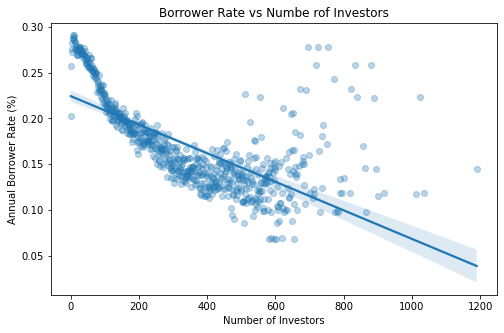

In [12]:
plt.figure(figsize=[8, 5])
inv = loan.groupby('Investors', as_index=False)['BorrowerAPR'].mean()
sns.regplot(data=inv, x='Investors', y='BorrowerAPR', scatter_kws={'alpha':0.3})
plt.ylabel('Annual Borrower Rate (%)')
plt.xlabel('Number of Investors')
plt.title('Borrower Rate vs Numbe rof Investors');

## Borrower Rate vs Prosper Rating and Number of Investors

This multivariate plot will reinforce that the highly rated loans will attract more investors and this should correlate with lower Borrower Rates.

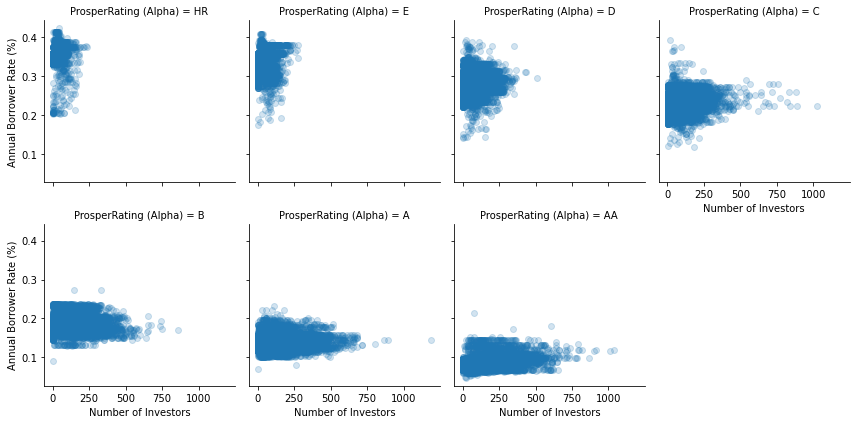

In [13]:
g = sns.FacetGrid(data = loan, col = 'ProsperRating (Alpha)', col_wrap= 4)

g.map(plt.scatter, 'Investors', 'BorrowerAPR', alpha=0.2)
g.set_xlabels('Number of Investors')
g.set_ylabels('Annual Borrower Rate (%)');

## Borrower Rate vs Homeowner status and time

From previous years the rates for home owners have been less than their counter parts and we will see it clearly.

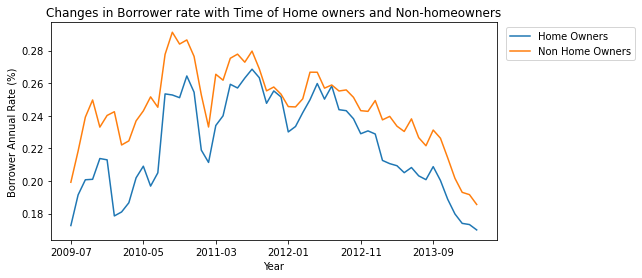

In [14]:
plt.figure(figsize=[8, 4])
loan.query('IsBorrowerHomeowner == True').groupby('year_month')['BorrowerAPR'].mean().plot(kind='line')
loan.query('IsBorrowerHomeowner == False').groupby('year_month')['BorrowerAPR'].mean().plot(kind='line')
plt.legend(['Home Owners', 'Non Home Owners'], bbox_to_anchor=(1.32, 1))
plt.ylabel('Borrower Annual Rate (%)')
plt.xlabel('Year')
plt.title('Changes in Borrower rate with Time of Home owners and Non-homeowners');

## Borrower Rate vs Income Range

The distribution of the Borrower Rate in each income range, gives us the idea that as your income increases then the rate on your loans might just take a decrease, there's no guarantee as even some high income still have high rates.

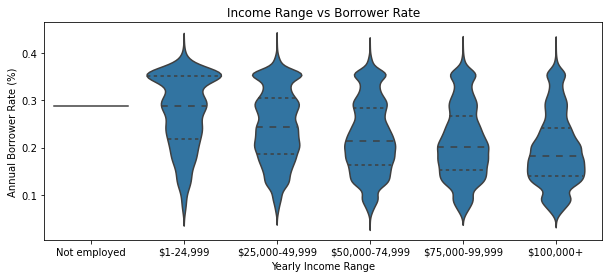

In [15]:
plt.figure(figsize=[10, 4])

sns.violinplot(data=loan, x='IncomeRange', y='BorrowerAPR', color=default_color, inner='quartile')
plt.ylabel('Annual Borrower Rate (%)')
plt.xlabel('Yearly Income Range')
plt.title('Income Range vs Borrower Rate');

## Borrower Rate vs Prosper Rating and Income Range

Getting the average Borrower Rate  for each income range but subsetting it by Prosper Rating, gives us the idea that no matter  your income range, having a high prosper rating will guarantee a low interest  loan

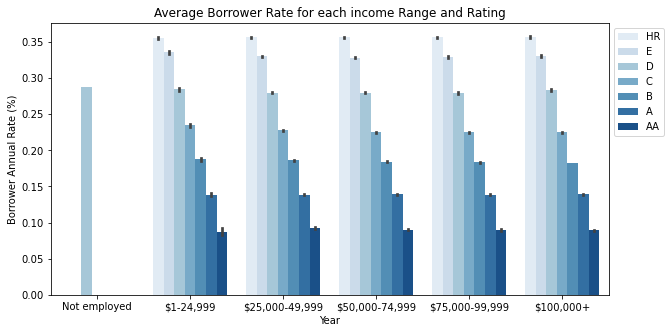

In [16]:
plt.figure(figsize=[10, 5])
sns.barplot(data = loan, x = 'IncomeRange', y='BorrowerAPR', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Borrower Annual Rate (%)')
plt.xlabel('Year')
plt.title('Average Borrower Rate for each income Range and Rating');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [17]:
!jupyter nbconvert Prosper_Loan_exploration_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Prosper_Loan_exploration_2.ipynb to slides
[NbConvertApp] Writing 1002350 bytes to Prosper_Loan_exploration_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Adiji Ayomiposi\.conda\envs\DA_ND\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Adiji Ayomiposi\.conda\envs\DA_ND\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Adiji Ayomiposi\.conda\envs\DA_ND\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Adiji Ayomiposi\.conda\envs\DA_ND\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_noteboo